**Examples**

Adding Sugar

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [3]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap15.py')

Downloaded chap15.py


In [4]:
from chap15 import change_func
from chap15 import run_simulation
from chap15 import make_system

Mixing Liquids

In [5]:
def mix(system1, system2):

    vola, volb = system1.volume, system2.volume
    tempA, tempB = system1.T_final, system2.T_final

    V_mix = vola + volb
    T_mix = (vola * tempA + volb * tempB) / V_mix

    return make_system(T_init=T_mix,
                       volume=V_mix,
                       r=system1.r,
                       t_end=30)

Mix First or Last?

In [24]:
r_tea = 0.25
tea = make_system(T_init=10, volume=50, r=r_tea, t_end=25)
r_sugar = 0.50
sugar = make_system(T_init=10, volume=50, r=r_sugar, t_end=25)
mix_first = mix(tea, sugar)
run_simulation(mix_first, change_func)
mix_first.T_final

21.99785701491796

In [25]:
run_simulation(tea, change_func)
run_simulation(sugar, change_func)
mix_last = mix(tea, sugar)
mix_last.T_final

21.995484560437077

Optimal Timing

In [26]:
def run_and_mix(t_add, t_total):
    tea.t_end = t_add
    tea_results = run_simulation(tea, change_func)

    sugar.t_end = t_add
    sugar_results = run_simulation(sugar, change_func)

    mixture = mix(tea, sugar)
    mixture.t_end = t_total - t_add
    results = run_simulation(mixture, change_func)

    return mixture.T_final

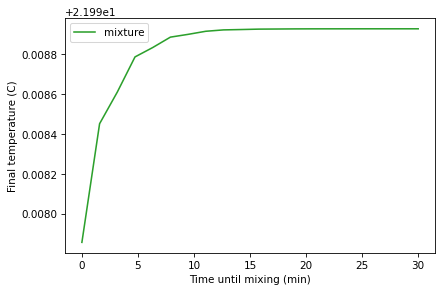

In [27]:
sweep = SweepSeries()
for t_add in linspace(0, 30, 20):
    sweep[t_add] = run_and_mix(t_add, 30)
sweep.plot(label='mixture', color='C2')
decorate(xlabel='Time until mixing (min)',
         ylabel='Final temperature (C)')

Analytic Solution

In [28]:
from numpy import log

def compute_r(system):
    t_end = system.t_end
    T_init = system.T_init
    T_final = system.T_final
    T_env = system.T_env

    r = log((T_init - T_env) / (T_final - T_env)) / t_end
    return r

In [29]:
tea2 = make_system(T_init=95, volume=100, r=0, t_end=35)
tea2.T_final = 50
r_tea2 = compute_r(tea2)
r_tea2

0.027378712313519637

In [30]:
from numpy import exp

def run_analysis(system):
    T_env, T_init, r = system.T_env, system.T_init, system.r

    t_array = linrange(system.t_0, system.t_end, system.dt)
    T_array = T_env + (T_init - T_env) * exp(-r * t_array)

    system.T_final = T_array[-1]
    return make_series(t_array, T_array)

In [31]:
tea2.r = r_tea2
results2 = run_analysis(tea2)
tea2.T_final

50.0

In [34]:
tea.r = 0.011543
results = run_simulation(tea, change_func)
results

Time
0.0     10.000000
1.0     10.138516
2.0     10.275433
3.0     10.410770
4.0     10.544544
5.0     10.676775
6.0     10.807479
7.0     10.936674
8.0     11.064378
9.0     11.190608
10.0    11.315381
11.0    11.438713
12.0    11.560622
13.0    11.681124
14.0    11.800235
15.0    11.917970
16.0    12.034347
17.0    12.149381
18.0    12.263087
19.0    12.375480
20.0    12.486576
21.0    12.596389
22.0    12.704935
23.0    12.812228
24.0    12.918282
25.0    13.023113
26.0    13.126733
27.0    13.229157
28.0    13.330399
29.0    13.430472
30.0    13.529390
Name: Quantity, dtype: float64

**Exercises**

Exercise 1

In [35]:
second_sugar_sys = make_system(T_init=70, volume=60, r=0, t_end=10)
second_sugar_sys.T_final = 25
r_second_sugar_sys = compute_r(second_sugar_sys)
r_second_sugar_sys
second_sugar_sys = make_system(T_init=70, volume=60, r=r_second_sugar_sys, t_end=10)
results2 = run_analysis(second_sugar_sys)
second_sugar_sys.T_final
sugar = make_system(T_init=70, volume=60, r=0.13296, t_end=10)
results = run_simulation(sugar, change_func)
from numpy import allclose
allclose(results, results2)

False

Exercise 2

In [36]:
#Refrigerator keeps the sugar at a constant temperature, a container where r = 0.
#T_init=4 and r_sugar = 0, best to add sugar at the tea shop.